# Start

**Dataset Description:** 
The "Salary Prediction Dataset" is a synthetic dataset curated for the purpose of facilitating salary prediction tasks. It encompasses a comprehensive range of simulated data points representing factors pivotal in determining salary levels. These factors include education, experience, location, job title, age, and gender. By encompassing diverse dimensions of individual profiles, the dataset provides a robust foundation for predictive modeling endeavors aimed at estimating salaries based on multifaceted influences.

**Project Overview:** 
This project centers on the analysis and prediction of salaries using regression models. The primary objective is to develop and deploy predictive models that accurately estimate salaries based on a variety of features present in the dataset. The project follows a systematic approach encompassing data exploration, preprocessing, model selection, training, evaluation.


**Steps Involved:**

1.  **Data Exploration:** The initial phase involves exploring the "Salary Prediction Dataset" to gain insights into its structure, distributions, and correlations among variables. Exploratory data analysis (EDA) techniques will be employed to understand the characteristics and nuances of the dataset.
    
2.  **Data Preprocessing:** Following exploration, the dataset undergoes preprocessing to address issues such as missing values, outliers, and feature scaling. Additionally, categorical variables may be encoded, and feature engineering techniques may be applied to enhance the predictive power of the models.
    
3.  **Model Selection:** Several regression models will be considered for predicting salaries, including linear regression, decision trees, random forests, support vector regression, and gradient boosting regressors. Each model will be evaluated based on performance metrics such as mean squared error (MSE), R-squared, and mean absolute error (MAE).
    
4.  **Model Training:** Selected models will be trained on the preprocessed dataset using appropriate training techniques. Hyperparameter tuning may be performed using techniques such as grid search or randomized search to optimize model performance.
    
5.  **Model Evaluation:** Trained models will be evaluated using cross-validation techniques to assess their generalization performance. The performance metrics obtained during evaluation will guide the selection of the most suitable model for deployment.
    

**Target:** The ultimate aim of this project is to build a robust and accurate predictive model capable of estimating salaries with high precision. By leveraging the diverse features present in the dataset, the project seeks to provide valuable insights into the factors influencing salary levels and empower organizations and individuals with the ability to make informed decisions regarding compensation.

# Library

In [1]:
# Base 
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Machine Learning Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
df = pd.read_csv("./Dataset/salary_prediction_data.csv")
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


The first thing usually done to gain a better understanding of the data is to check for any deficiencies or anything that could potentially affect future predictions. This includes looking for missing values, inconsistencies, imbalances, and so on.

### Missing Value

In [4]:
df.isna().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

### Descriptive Data

In [5]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


### Categories Data

In [6]:
categoricals = ["Education", "Location", "Job_Title", "Gender"]

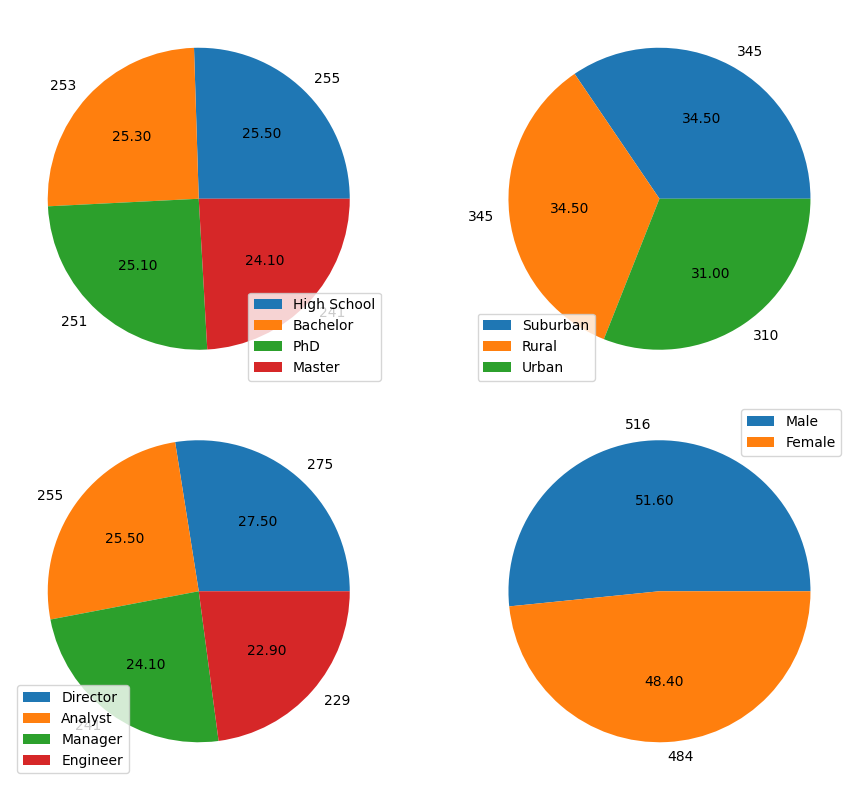

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

index = 0

for i in range(2):
    for j in range(2):
        counts = df[categoricals[index]].value_counts()
        axes[i][j].pie(counts, autopct="%0.2f", labels = counts)
        axes[i][j].legend(counts.index)
        index += 1
        
plt.tight_layout()
plt.show()

**Job Titles**

There are five job titles in the data provided:

1. Director
2. Analyst
3. Manager
4. Engineer
5. High School
6. Bachelor
7. PhD
8. Master

**Education Levels**

There are four education levels in the data provided:

1. High School
2. Bachelor
3. PhD
4. Master

**Locations**

There are three locations in the data provided:

1. Suburban
2. Rural
3. Urban

**Gender**

There are two genders in the data provided:

1. Male
2. Female

### Feature Engineering

create a new variables for EDA

In [8]:
df["Gender-Job Title"] = df["Gender"] + "-" + df["Job_Title"]
df["Education-Job Title"] = df["Education"] + "-" + df["Job_Title"]

df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary,Gender-Job Title,Education-Job Title
0,High School,8,Urban,Manager,63,Male,84620.053665,Male-Manager,High School-Manager
1,PhD,11,Suburban,Director,59,Male,142591.255894,Male-Director,PhD-Director
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404,Female-Manager,Bachelor-Manager
3,High School,29,Rural,Director,45,Male,96834.671282,Male-Director,High School-Director
4,PhD,25,Urban,Analyst,26,Female,132157.786175,Female-Analyst,PhD-Analyst


I have created two new columns as variables for this EDA - Gender-Job Title and Education-Job. This is to explore potential insights on gender differences across the same job title, and the impact of having the same job but with different education levels.

# Visualization

## Count of all education levels and genders each job titles

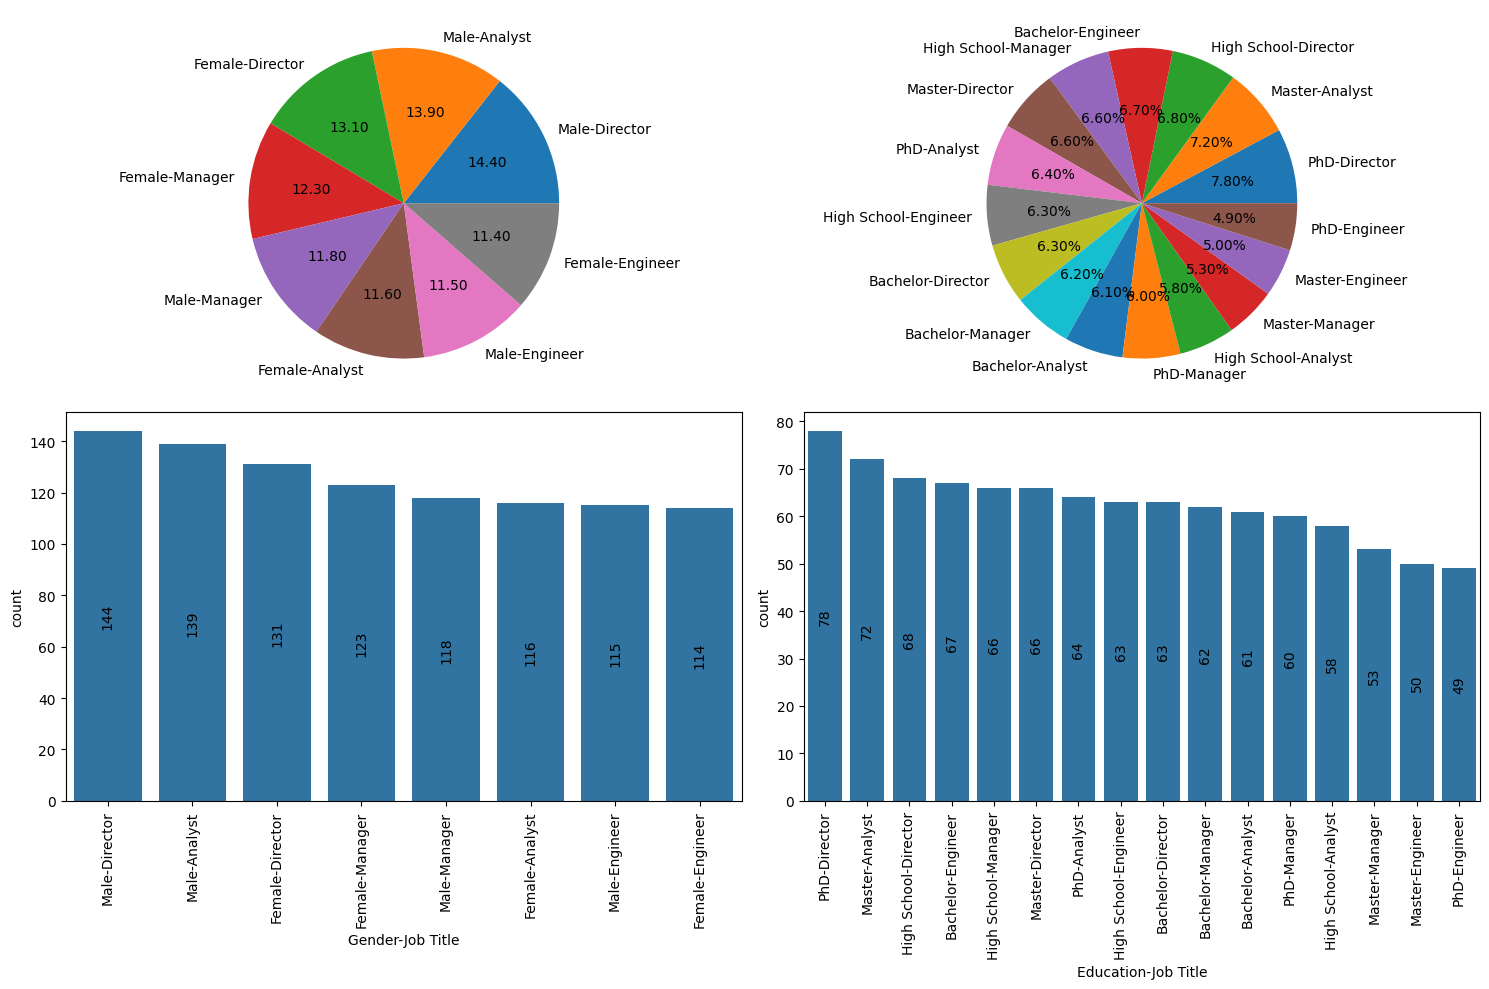

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Gender-Job Title Pie Chart
counts = df["Gender-Job Title"].value_counts()
axes[0][0].pie(counts.values, autopct="%0.2f", labels=counts.index)

sns.barplot(x=counts.index, y=counts, ax=axes[1][0])

for container in axes[1][0].containers:
    axes[1][0].bar_label(container, rotation=90, label_type="center")

axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=90)

# Education-Job Title Pie Chart
counts = df["Education-Job Title"].value_counts()
axes[0][1].pie(counts.values, autopct="%0.2f%%", labels=counts.index)

sns.barplot(x=counts.index, y=counts, ax=axes[1][1])

for container in axes[1][1].containers:
    axes[1][1].bar_label(container, rotation=90, label_type="center")

axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

## Mean salary for each category

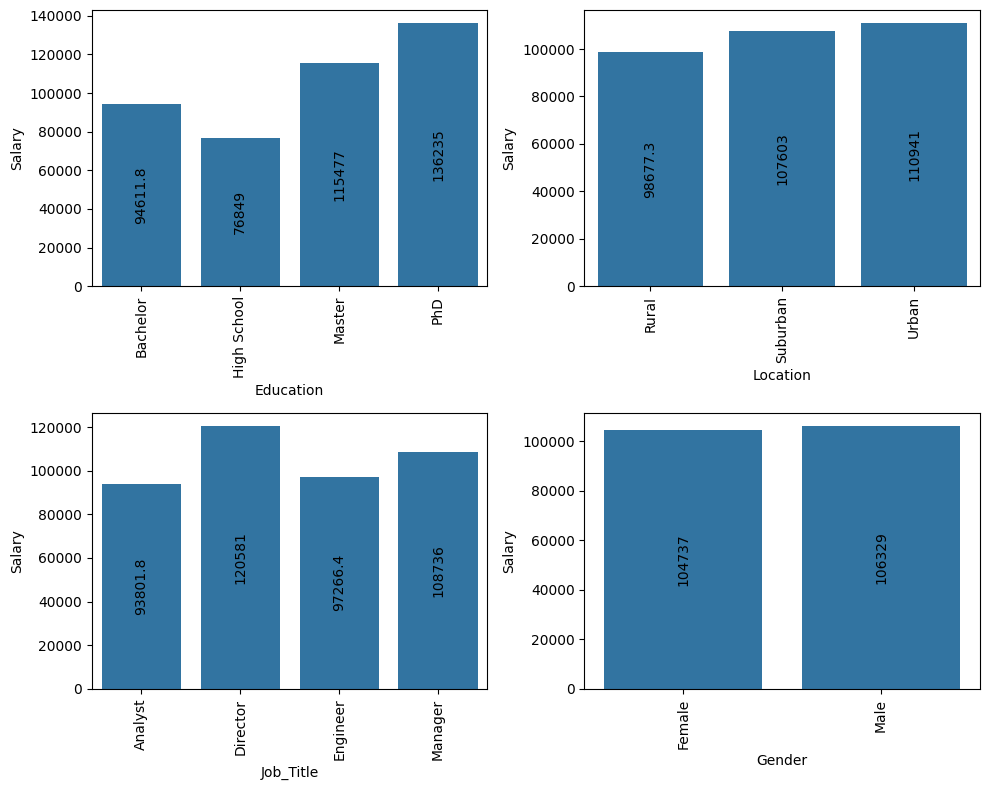

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

index = 0

for i in range(2):
    for j in range(2):
        group = df.groupby(categoricals[index])
        means = group["Salary"].mean()
        sns.barplot(x=means.index, y=means, ax=axes[i][j])
        for container in axes[i][j].containers:
            axes[i][j].bar_label(container, rotation=90, label_type="center")
        axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=90)
        index += 1
        
plt.tight_layout()
plt.show()

## Mean salary for job titles divided for each gender and education level


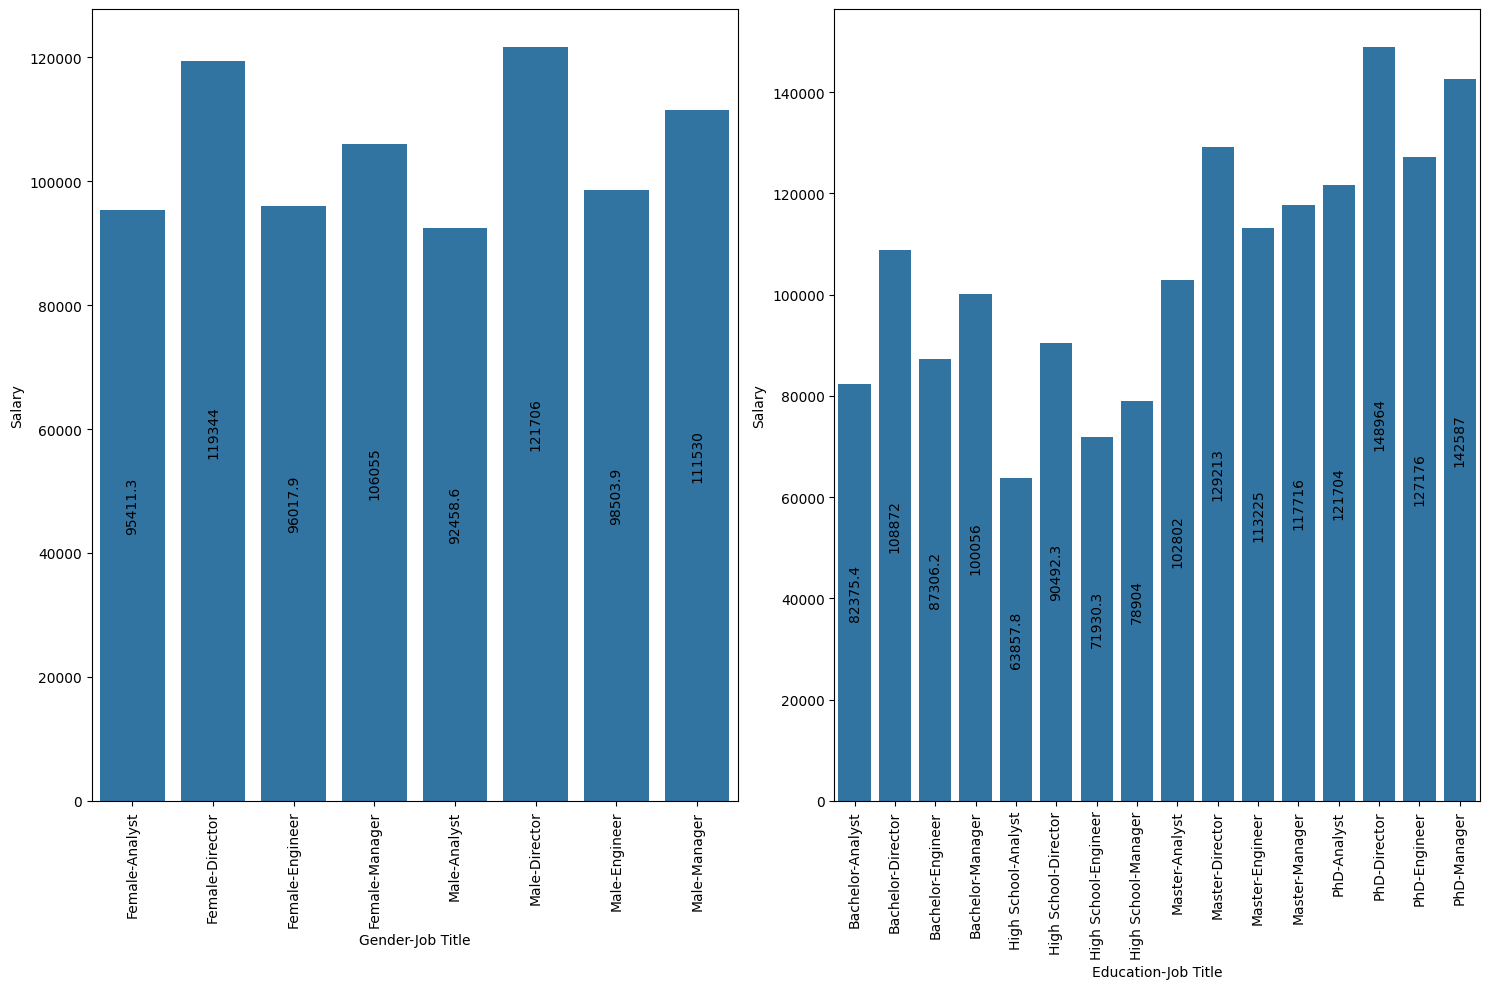

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
group = df.groupby("Gender-Job Title")
counts = group["Salary"].mean()

sns.barplot(x=counts.index, y=counts, ax=axes[0])

for container in axes[0].containers:
    axes[0].bar_label(container, rotation=90, label_type="center")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

group = df.groupby("Education-Job Title")
counts = group["Salary"].mean()

sns.barplot(x=counts.index, y=counts, ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container, rotation=90, label_type="center")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

## Data distribution using pairplots¶

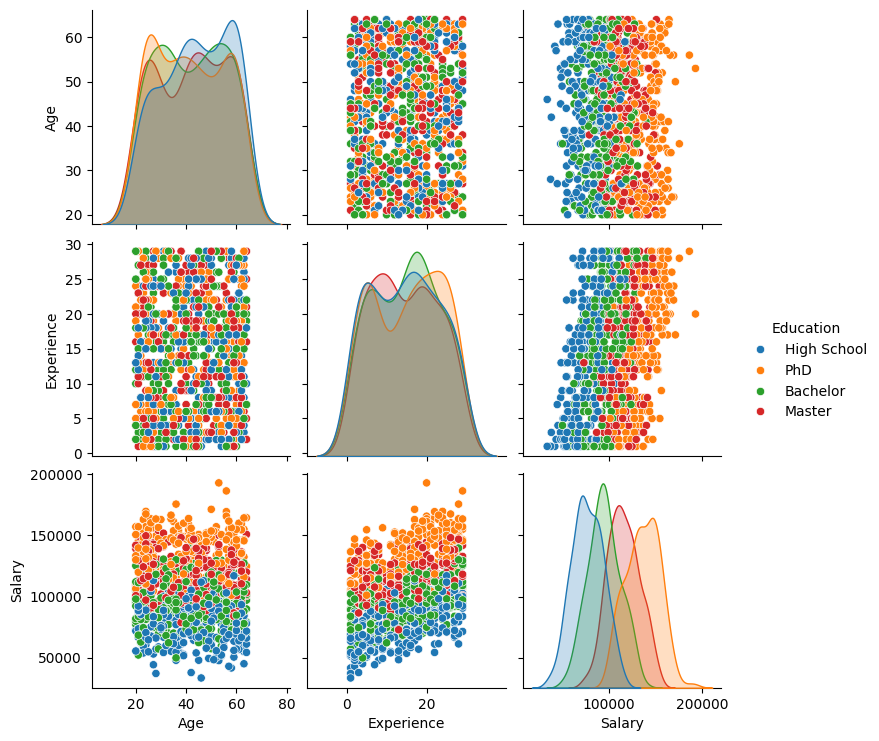

In [24]:
sns.pairplot(df, vars=["Age", "Experience", "Salary"], hue="Education")
plt.show()

## Data distribution among classes using boxplots¶

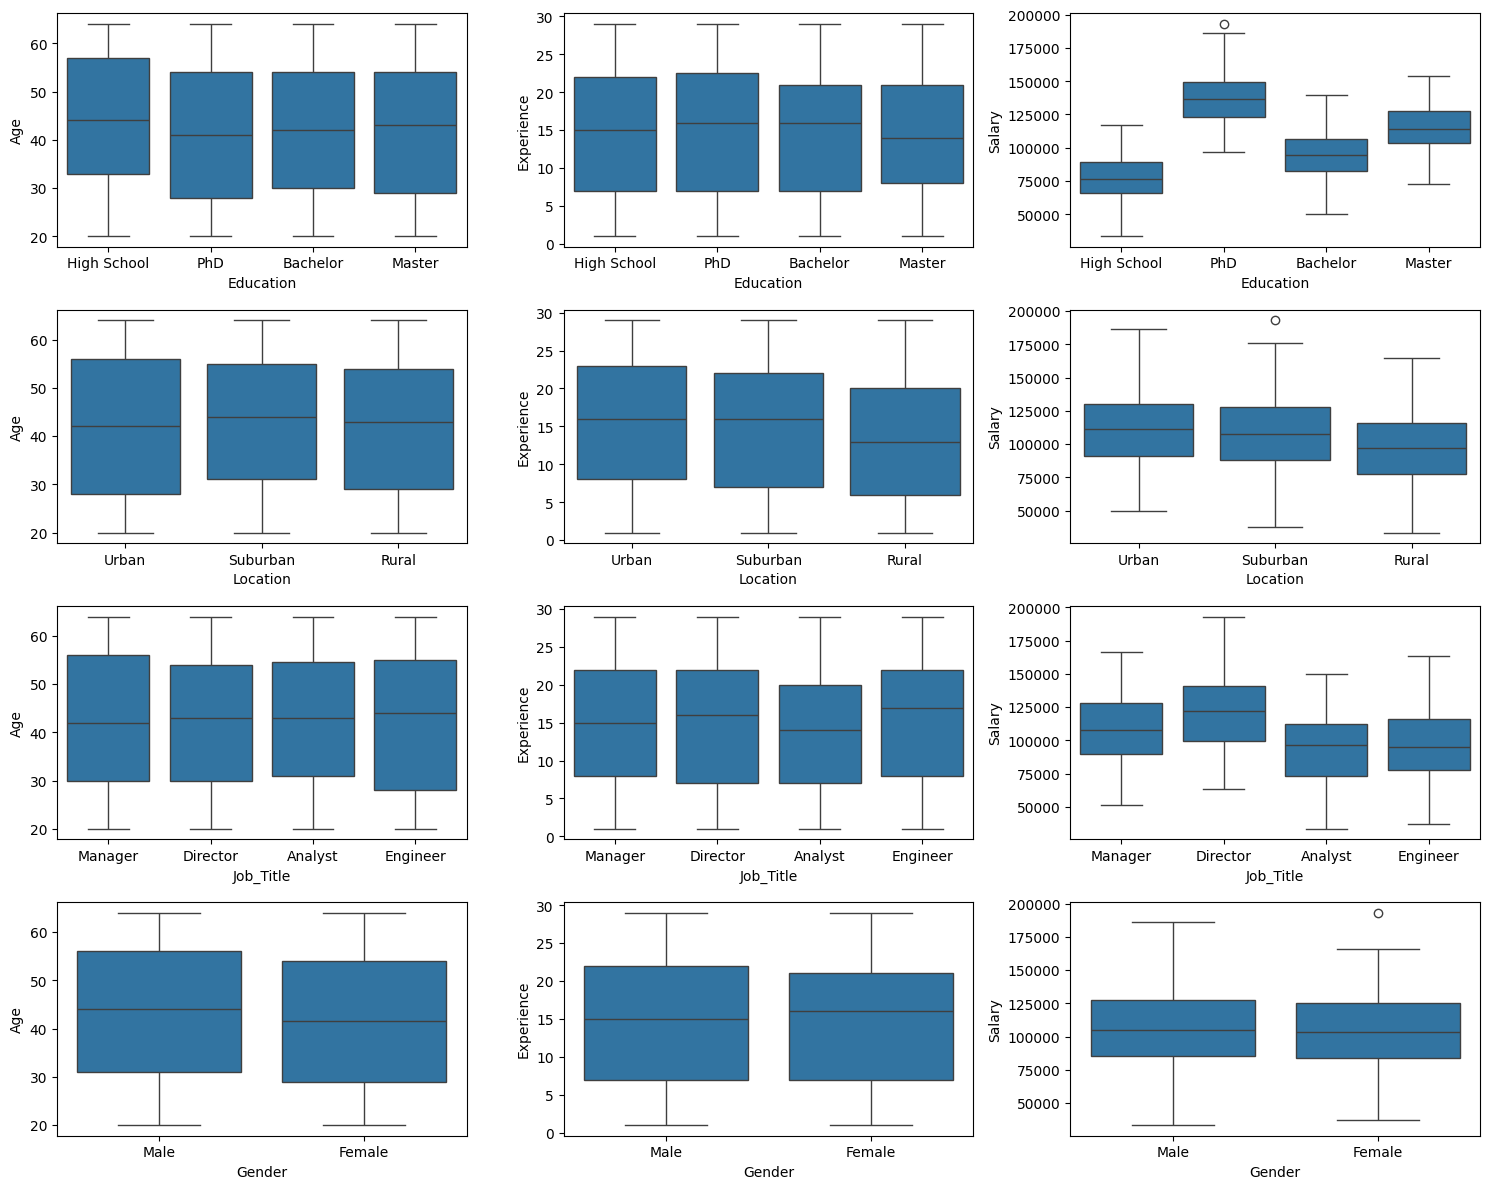

In [25]:
nums = ["Age", "Experience", "Salary"]
fig, axes = plt.subplots(nrows=len(categoricals), ncols=len(nums), figsize=(15, 12))
for i in range(len(categoricals)):
    for j in range(len(nums)):
        sns.boxplot(df, x=categoricals[i], y=nums[j], ax=axes[i][j])

plt.tight_layout()
plt.show()

# Preprocessing

## Encoding Data

In [26]:
le = LabelEncoder()

for i in categoricals:
    df[i] = le.fit_transform(df[i])

## Scaling Data

In [27]:
x = df.iloc[:, :-3].values
y = df.iloc[:, -3].values
y = y.reshape(-1, 1)

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

y = y.ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

## Defining models and tuning their hyperparameters

In [28]:
rfr = RandomForestRegressor()
abr = AdaBoostRegressor(learning_rate=0.9)
svr = SVR(C=0.9, epsilon=0.01)
lnr = LinearRegression()
xgb = XGBRegressor(learning_rate=0.01, gamma=0.01)

models = [rfr, abr, svr, lnr, xgb]
names = ["Random Forest", "Ada Boost", "Support Vectors", "XGB"]

# Evaluation

In [33]:
results = []

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append([model.__class__.__name__, r2, mse, mae])

results_df = pd.DataFrame(results, columns=["Model", "R2", "MSE", "MAE"])

print(results_df.to_string(index=False))

                Model       R2      MSE      MAE
RandomForestRegressor 0.845222 0.005052 0.058564
    AdaBoostRegressor 0.799717 0.006538 0.066841
                  SVR 0.818779 0.005915 0.061451
     LinearRegression 0.578927 0.013745 0.095534
         XGBRegressor 0.724770 0.008984 0.075557
